In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# (1) _Code for manually enter two layers coating 

Enter RI of first material (n1): 3
Enter RI of second material (n2): 1.5
Enter thickness of the first layer (d1 in nm): 100
Enter thickness of the second layer (d2 in nm): 150
Enter minimum wavelength (nm): 400
Enter maximum wavelength (nm): 1200
enter the angle of incidence:0
Enter the mode [1 for TE, and 0 for TM]: 1


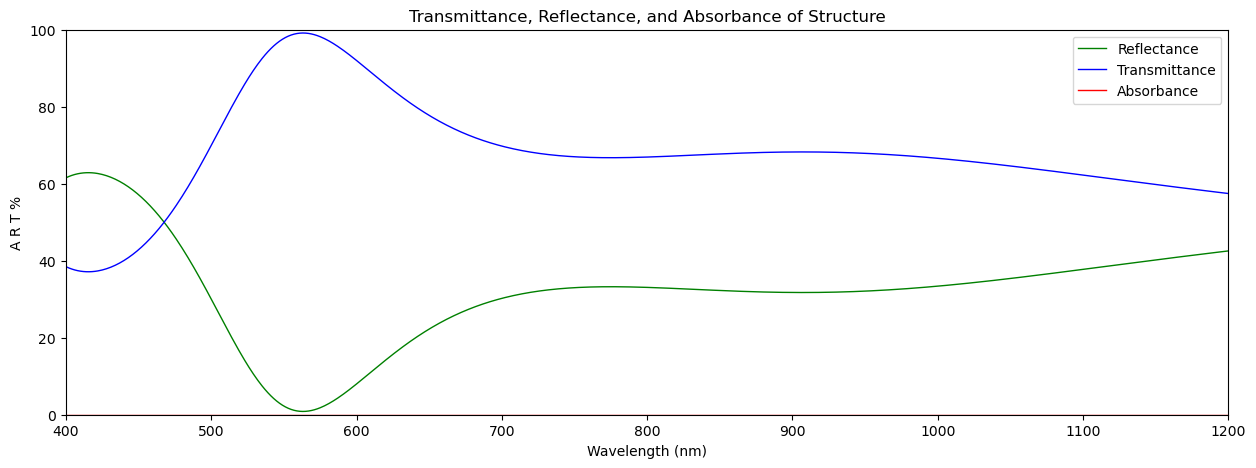

"\nplt.figure()\nplt.figure(figsize=(18,6))\nplt.plot(wavelength, reflectance * 100, 'k' , linewidth = 2)\nplt.xlabel('Wavelength (nm)')\nplt.ylabel('Reflectance %')\nplt.xlim([lambda_min, lambda_max])\nplt.ylim([0, 100])\nplt.title('Reflectance of Structure')\nplt.show()\n\nplt.figure()\nplt.figure(figsize=(18,6))\nplt.plot(wavelength, transmittance * 100, 'b-', linewidth=2)\nplt.xlabel('Wavelength (nm)')\nplt.ylabel('Transmittance %')\nplt.xlim([lambda_min, lambda_max])\nplt.ylim([0, 100])\nplt.title('Transmittance of Structure')\nplt.show()\n\nplt.figure()\nplt.figure(figsize=(18,6))\nplt.plot(wavelength, absorbance * 100, 'y-', linewidth=2)\nplt.xlabel('Wavelength (nm)')\nplt.ylabel('Absorbance %')\nplt.xlim([lambda_min, lambda_max])\nplt.ylim([0, 100])\nplt.title('Absorbance of Structure')\nplt.show()"

In [2]:
# Manual input of parameters
n1 = float(input("Enter RI of first material (n1): "))
n2 = float(input("Enter RI of second material (n2): "))
d1 = float(input("Enter thickness of the first layer (d1 in nm): "))
d2 = float(input("Enter thickness of the second layer (d2 in nm): "))
lambda_min = float(input("Enter minimum wavelength (nm): "))
lambda_max = float(input("Enter maximum wavelength (nm): "))

# Rest of the parameters
angle = int(input ("enter the angle of incidence:"))

val = int(input("Enter the mode [1 for TE, and 0 for TM]: "))  
p = np.cos(np.radians(angle))
q = np.sin(np.radians(angle))

e0 = 8.85418782E-12
u0 = 1.25663706E-6

# Calculate wavelength range and initialize arrays
N = int(lambda_max - lambda_min) + 1
wavelength = np.linspace(lambda_min, lambda_max, N)
reflectance = np.zeros(N)
transmittance = np.zeros(N)
absorbance = np.zeros(N)

for i in range(len(wavelength)):
    _lambda = wavelength[i]

    # Calculate the wavevector in each layer
    k0 = (2 * np.pi / _lambda) * (180 / np.pi)
    k1 = k0 * n1 * np.cos(np.radians(np.arcsin(q / n1)))
    k2 = k0 * n2 * np.cos(np.radians(np.arcsin(q / n2)))

    # Calculate the phase shift in each layer
    phi1 = k1 * d1
    phi2 = k2 * d2

    # Calculate admittance for end layers
    if val == 1:
        Y0 = (np.sqrt(e0 / u0)) * p
        Y1 = (np.sqrt(e0 / u0)) * n1 * np.cos(np.radians(np.arcsin(q / n1)))
        Y2 = (np.sqrt(e0 / u0)) * n2 * np.cos(np.radians(np.arcsin(q / n2)))
        Y3 = (np.sqrt(e0 / u0)) * p
    else:
        Y0 = (np.sqrt(e0 / u0)) / p
        Y1 = (np.sqrt(e0 / u0)) * n1 / np.cos(np.radians(np.arcsin(q / n1)))
        Y2 = (np.sqrt(e0 / u0)) * n2 / np.cos(np.radians(np.arcsin(q / n2)))
        Y3 = (np.sqrt(e0 / u0)) / p

    # Construct the transfer matrix
    M1 = np.array([[np.cos(np.radians(phi1)), 1j * np.sin(np.radians(phi1)) / Y1],
                   [1j * Y1 * np.sin(np.radians(phi1)), np.cos(np.radians(phi1))]])
    M2 = np.array([[np.cos(np.radians(phi2)), 1j * np.sin(np.radians(phi2)) / Y2],
                   [1j * Y2 * np.sin(np.radians(phi2)), np.cos(np.radians(phi2))]])
    T = np.dot(M1, M2)

    # Calculate the reflection and transmission coefficients
    t = (2 * Y0) / ((Y0 * T[0, 0] + Y0 * Y3 * T[0, 1]) + T[1, 0] + Y3 * T[1, 1])
    r = ((Y0 * T[0, 0] + Y0 * Y3 * T[0, 1]) - T[1, 0] - Y3 * T[1, 1]) / (
            (Y0 * T[0, 0] + Y0 * Y3 * T[0, 1]) + T[1, 0] + Y3 * T[1, 1])

    # Calculate optical parameters
    reflectance[i] = np.abs(r) ** 2
    transmittance[i] = np.abs(t) ** 2
    absorbance[i] = 1 - reflectance[i] - transmittance[i]

# Plot the results
plt.figure(figsize=(15,5))
plt.plot(wavelength, reflectance * 100, 'g-', linewidth=1, label='Reflectance')
plt.plot(wavelength, transmittance * 100, 'b-', linewidth=1, label='Transmittance')
plt.plot(wavelength, absorbance * 100, 'r-', linewidth=1, label='Absorbance')
plt.xlabel('Wavelength (nm)')
plt.ylabel('A R T %')
plt.xlim(lambda_min, lambda_max)
plt.ylim(0, 100)
plt.title('Transmittance, Reflectance, and Absorbance of Structure')
plt.legend()
plt.show()


# Plot the results (code for seperate plot)
"""
plt.figure()
plt.figure(figsize=(18,6))
plt.plot(wavelength, reflectance * 100, 'k' , linewidth = 2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance %')
plt.xlim([lambda_min, lambda_max])
plt.ylim([0, 100])
plt.title('Reflectance of Structure')
plt.show()

plt.figure()
plt.figure(figsize=(18,6))
plt.plot(wavelength, transmittance * 100, 'b-', linewidth=2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmittance %')
plt.xlim([lambda_min, lambda_max])
plt.ylim([0, 100])
plt.title('Transmittance of Structure')
plt.show()

plt.figure()
plt.figure(figsize=(18,6))
plt.plot(wavelength, absorbance * 100, 'y-', linewidth=2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance %')
plt.xlim([lambda_min, lambda_max])
plt.ylim([0, 100])
plt.title('Absorbance of Structure')
plt.show()"""


# (2)_Code for manually enter n-layers of AR coating 

Enter the number of layers: 2
Enter RI of 1 material (n[1]): 3
Enter thickness of the 1 layer (d1 in nm): 100
Enter RI of 2 material (n[2]): 1.5
Enter thickness of the 2 layer (d2 in nm): 150
Enter minimum wavelength (nm): 400
Enter maximum wavelength (nm): 1200
Enter the angle of incidence: 0
Enter the mode [1 for TE, and 0 for TM]: 1


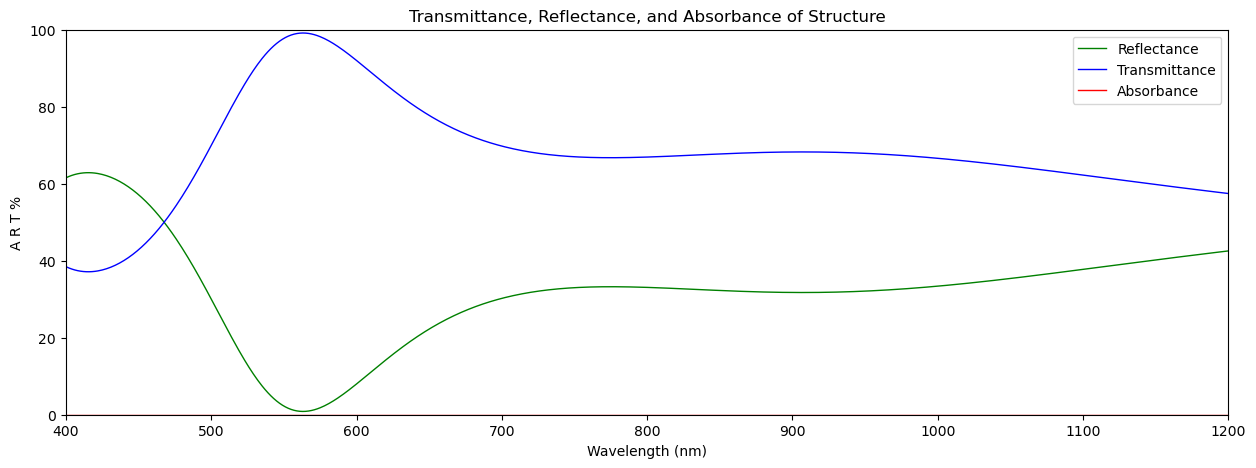

"\n# Plot the results (code for seperate plot)\nplt.figure(figsize=(18, 6))\nplt.plot(wavelength, reflectance * 100, 'k', linewidth=2)\nplt.xlabel('Wavelength (nm)')\nplt.ylabel('Reflectance %')\nplt.xlim([lambda_min, lambda_max])\nplt.ylim([0, 100])\nplt.title('Reflectance of Structure')\nplt.show()\n\nplt.figure(figsize=(18, 6))\nplt.plot(wavelength, transmittance * 100, 'b-', linewidth=2)\nplt.xlabel('Wavelength (nm)')\nplt.ylabel('Transmittance %')\nplt.xlim([lambda_min, lambda_max])\nplt.ylim([0, 100])\nplt.title('Transmittance of Structure')\nplt.show()\n\nplt.figure(figsize=(18, 6))\nplt.plot(wavelength, absorbance * 100, 'y-', linewidth=2)\nplt.xlabel('Wavelength (nm)')\nplt.ylabel('Absorbance %')\nplt.xlim([lambda_min, lambda_max])\nplt.ylim([0, 100])\nplt.title('Absorbance of Structure')\nplt.show()"

In [3]:
# Manual input of parameters
num_layers = int(input("Enter the number of layers: "))
n = []
d = []
for i in range(1, num_layers + 1):
    n.append(float(input(f"Enter RI of {i} material (n[{i}]): ")))
    d.append(float(input(f"Enter thickness of the {i} layer (d{i} in nm): ")))

lambda_min = float(input("Enter minimum wavelength (nm): "))
lambda_max = float(input("Enter maximum wavelength (nm): "))
angle = int(input("Enter the angle of incidence: "))
val = int(input("Enter the mode [1 for TE, and 0 for TM]: "))

# Rest of the parameters
p = np.cos(np.radians(angle))
q = np.sin(np.radians(angle))

e0 = 8.85418782E-12
u0 = 1.25663706E-6

# Calculate wavelength range and initialize arrays
N = int(lambda_max - lambda_min) + 1
wavelength = np.linspace(lambda_min, lambda_max, N)
reflectance = np.zeros(N)
transmittance = np.zeros(N)
absorbance = np.zeros(N)

# Loop over each wavelength
for w in range(len(wavelength)):
    _lambda = wavelength[w]
    
    k = []
    phi = []
    Y = []
    matrix_list = []

    for i in range(num_layers):
        # Calculate the wavevectors for all layers
        k0 = (2 * np.pi / _lambda) * (180 / np.pi)
        k.append(k0 * n[i] * np.cos(np.radians(np.arcsin(q / n[i]))))  # using i because n-list index start from zero
    
    for i in range(num_layers):
        # Calculate the phase shifts for all layers
        phi.append(k[i] * d[i])
    
    for i in range(num_layers):
        # Calculate admittances for end layers
        if val == 1:
            Y0 = (np.sqrt(e0 / u0)) * p
            Y.append((np.sqrt(e0 / u0)) * n[i] * np.cos(np.radians(np.arcsin(q / n[i]))))
            Y_S = (np.sqrt(e0 / u0)) * p
        else:
            Y0 = (np.sqrt(e0 / u0)) / p
            Y.append((np.sqrt(e0 / u0)) * n[i] / np.cos(np.radians(np.arcsin(q / n[i]))))
            Y_S = (np.sqrt(e0 / u0)) / p
            
    for phi_i, Y_i in zip(phi, Y):
        matrix_list.append(np.array([[np.cos(np.radians(phi_i)), 1j * np.sin(np.radians(phi_i)) / Y_i],
                                     [1j * Y_i * np.sin(np.radians(phi_i)), np.cos(np.radians(phi_i))]]))
    
    result_matrix = matrix_list[0]
    for i in range(1, len(matrix_list)):
        result_matrix = np.dot(result_matrix, matrix_list[i])
            
    T = result_matrix

    # Calculate the reflection and transmission coefficients
    t = (2 * Y0) / ((Y0 * T[0, 0] + Y0 * Y_S * T[0, 1]) + T[1, 0] + Y_S * T[1, 1])
    r = ((Y0 * T[0, 0] + Y0 * Y_S * T[0, 1]) - T[1, 0] - Y_S * T[1, 1]) / (
            (Y0 * T[0, 0] + Y0 * Y_S * T[0, 1]) + T[1, 0] + Y_S * T[1, 1])
    
    # Calculate ART
    reflectance[w] = np.abs(r) ** 2
    transmittance[w] = np.abs(t) ** 2
    absorbance[w] = 1 - reflectance[w] - transmittance[w]
    

    
# Plot the results
plt.figure(figsize=(15,5))
plt.plot(wavelength, reflectance * 100, 'g-', linewidth=1, label='Reflectance')
plt.plot(wavelength, transmittance * 100, 'b-', linewidth=1, label='Transmittance')
plt.plot(wavelength, absorbance * 100, 'r-', linewidth=1, label='Absorbance')
plt.xlabel('Wavelength (nm)')
plt.ylabel('A R T %')
plt.xlim(lambda_min, lambda_max)
plt.ylim(0, 100)
plt.title('Transmittance, Reflectance, and Absorbance of Structure')
plt.legend()
plt.show()



"""
# Plot the results (code for seperate plot)
plt.figure(figsize=(18, 6))
plt.plot(wavelength, reflectance * 100, 'k', linewidth=2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance %')
plt.xlim([lambda_min, lambda_max])
plt.ylim([0, 100])
plt.title('Reflectance of Structure')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(wavelength, transmittance * 100, 'b-', linewidth=2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmittance %')
plt.xlim([lambda_min, lambda_max])
plt.ylim([0, 100])
plt.title('Transmittance of Structure')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(wavelength, absorbance * 100, 'y-', linewidth=2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance %')
plt.xlim([lambda_min, lambda_max])
plt.ylim([0, 100])
plt.title('Absorbance of Structure')
plt.show()"""


# (3)_Code for high and low type multilayers coating

Enter the number of layer pairs: 3
Enter the refractive index of the high-index material (n_H): 3
Enter the refractive index of the low-index material (n_L): 1.5
Enter the thickness of the high-index layer (d_H in nm): 100
Enter the thickness of the low-index layer (d_L in nm): 150
Enter minimum wavelength (nm): 400
Enter maximum wavelength (nm): 1200
Enter the angle of incidence: 0
Enter the mode [1 for TE, and 0 for TM]: 1


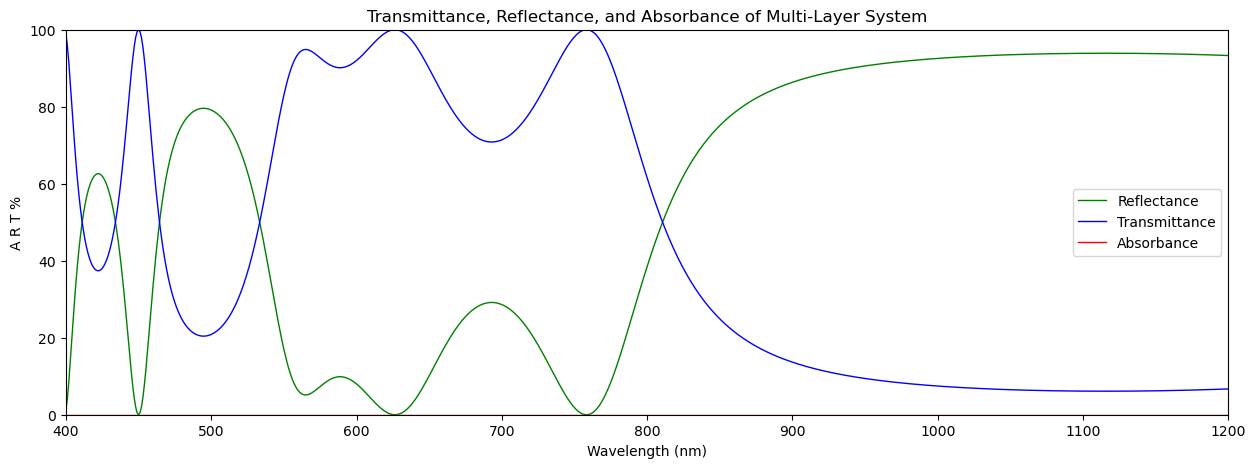

In [4]:
# Manual input of parameters
num_pairs = int(input("Enter the number of layer pairs: "))
n_H = float(input("Enter the refractive index of the high-index material (n_H): "))
n_L = float(input("Enter the refractive index of the low-index material (n_L): "))
thickness_H = float(input("Enter the thickness of the high-index layer (d_H in nm): "))
thickness_L = float(input("Enter the thickness of the low-index layer (d_L in nm): "))
lambda_min = float(input("Enter minimum wavelength (nm): "))
lambda_max = float(input("Enter maximum wavelength (nm): "))

# Rest of the parameters
angle = int(input("Enter the angle of incidence: "))
val = int(input("Enter the mode [1 for TE, and 0 for TM]: "))
p = np.cos(np.radians(angle))
q = np.sin(np.radians(angle))

e0 = 8.85418782E-12
u0 = 1.25663706E-6

# Calculate wavelength range and initialize arrays
N = int(lambda_max - lambda_min) + 1
wavelength = np.linspace(lambda_min, lambda_max, N)
reflectance = np.zeros(N)
transmittance = np.zeros(N)
absorbance = np.zeros(N)

for i in range(len(wavelength)):
    _lambda = wavelength[i]

    # Calculate the wavevector in each layer
    k0 = (2 * np.pi / _lambda) * (180 / np.pi)
    k_H = k0 * n_H * np.cos(np.radians(np.arcsin(q / n_H)))
    k_L = k0 * n_L * np.cos(np.radians(np.arcsin(q / n_L)))

    # Calculate the phase shift in each layer
    phi_H = k_H * thickness_H
    phi_L = k_L * thickness_L

    # Calculate admittance for end layers
    if val == 1:
        Y0 = (np.sqrt(e0 / u0)) * p
        Y1 = (np.sqrt(e0 / u0)) * n_H * np.cos(np.radians(np.arcsin(q / n_H)))
        Y2 = (np.sqrt(e0 / u0)) * n_L * np.cos(np.radians(np.arcsin(q / n_L)))
        Y3 = (np.sqrt(e0 / u0)) * p
    else:
        Y0 = (np.sqrt(e0 / u0)) / p
        Y1 = (np.sqrt(e0 / u0)) * n_H / np.cos(np.radians(np.arcsin(q / n_H)))
        Y2 = (np.sqrt(e0 / u0)) * n_L / np.cos(np.radians(np.arcsin(q / n_L)))
        Y3 = (np.sqrt(e0 / u0)) / p

    # Initialize transfer matrix as identity matrix
    T = np.identity(2)

    # Construct the transfer matrix for the multilayer system
    for j in range(num_pairs):
        M_H = np.array([[np.cos(np.radians(phi_H)), 1j * np.sin(np.radians(phi_H)) / Y1],
                         [1j * Y1 * np.sin(np.radians(phi_H)), np.cos(np.radians(phi_H))]])
        M_L = np.array([[np.cos(np.radians(phi_L)), 1j * np.sin(np.radians(phi_L)) / Y2],
                         [1j * Y2 * np.sin(np.radians(phi_L)), np.cos(np.radians(phi_L))]])
        T = np.dot(T, M_H)
        T = np.dot(T, M_L)

    # Calculate the reflection and transmission coefficients
    t = (2 * Y0) / ((Y0 * T[0, 0] + Y0 * Y3 * T[0, 1]) + T[1, 0] + Y3 * T[1, 1])
    r = ((Y0 * T[0, 0] + Y0 * Y3 * T[0, 1]) - T[1, 0] - Y3 * T[1, 1]) / (
            (Y0 * T[0, 0] + Y0 * Y3 * T[0, 1]) + T[1, 0] + Y3 * T[1, 1])

    # Calculate optical parameters
    reflectance[i] = np.abs(r) ** 2
    transmittance[i] = np.abs(t) ** 2
    absorbance[i] = 1 - reflectance[i] - transmittance[i]

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(wavelength, reflectance * 100, 'g-', linewidth=1, label='Reflectance')
plt.plot(wavelength, transmittance * 100, 'b-', linewidth=1, label='Transmittance')
plt.plot(wavelength, absorbance * 100, 'r-', linewidth=1, label='Absorbance')
plt.xlabel('Wavelength (nm)')
plt.ylabel('A R T %')
plt.xlim(lambda_min, lambda_max)
plt.ylim(0, 100)
plt.title('Transmittance, Reflectance, and Absorbance of Multi-Layer System')
plt.legend()
plt.show()
